In [1]:
import pandas as pd
df=pd.read_csv('Raichur\data_15.65_76.73.csv')
df.head()


,NDVI,date,latitude,longitude
0,0.4907,2010-01-01,15.65,76.73
1,0.5149,2010-01-17,15.65,76.73
2,0.6415,2010-02-02,15.65,76.73
3,0.5984,2010-02-18,15.65,76.73
4,0.7282,2010-03-06,15.65,76.73


In [2]:
df1=df.reset_index()['NDVI']
df1.head(10)

0    0.4907
1    0.5149
2    0.6415
3    0.5984
4    0.7282
5    0.4744
6    0.3173
7    0.2686
8    0.2486
9    0.2409
Name: NDVI, dtype: float64

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
print(df1)

[[0.51786148]
 [0.5472661 ]
 [0.70109356]
 [0.64872418]
 [0.80643985]
 [0.49805589]
 [0.30716889]
 [0.24799514]
 [0.2236938 ]
 [0.21433779]
 [0.14459295]
 [0.35917375]
 [0.41725395]
 [0.09659781]
 [0.19611179]
 [0.08979344]
 [0.7018226 ]
 [0.73511543]
 [0.78869988]
 [0.82600243]
 [0.74605103]
 [0.43961118]
 [0.42818955]
 [0.4835966 ]
 [0.44349939]
 [0.52879708]
 [0.53402187]
 [0.84021871]
 [0.66974484]
 [0.4600243 ]
 [0.41494532]
 [0.24617254]
 [0.30814095]
 [0.33669502]
 [0.38335358]
 [0.09100851]
 [0.05054678]
 [0.3144593 ]
 [0.45674362]
 [0.55431349]
 [0.90048603]
 [0.8199271 ]
 [0.63961118]
 [0.58578372]
 [0.47885784]
 [0.41956258]
 [0.33402187]
 [0.36743621]
 [0.3873633 ]
 [0.51421628]
 [0.48760632]
 [0.58590522]
 [0.43074119]
 [0.34434994]
 [0.26767922]
 [0.23523694]
 [0.24240583]
 [0.22989064]
 [0.23705954]
 [0.18882139]
 [0.11919806]
 [0.1218712 ]
 [0.49392467]
 [0.80534629]
 [0.69659781]
 [0.79659781]
 [0.79951397]
 [0.5363305 ]
 [0.42818955]
 [0.3345079 ]
 [0.33122722]
 [0.41

In [6]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
training_size,test_size


(255, 46)

In [8]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=10):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(244, 10)
(244,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(35, 10)
(35,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 10, 128)           33792     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 128)           98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                        

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

4/4 [==============================] - 9s 609ms/step - loss: 0.1919 - val_loss: 0.1034
Epoch 2/100
4/4 [==============================] - 0s 33ms/step - loss: 0.0766 - val_loss: 0.0921
Epoch 3/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0683 - val_loss: 0.0958
Epoch 4/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0651 - val_loss: 0.1028
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0626 - val_loss: 0.0799
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0562 - val_loss: 0.0731
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0583 - val_loss: 0.0736
Epoch 8/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0552 - val_loss: 0.0831
Epoch 9/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0533 - val_loss: 0.0780
Epoch 10/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0514 - val_loss: 0.0703
Epoch 11/100
4/4 

In [17]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.1495637651183069

In [20]:
math.sqrt(mean_squared_error(ytest,test_predict))


0.21441912845230898

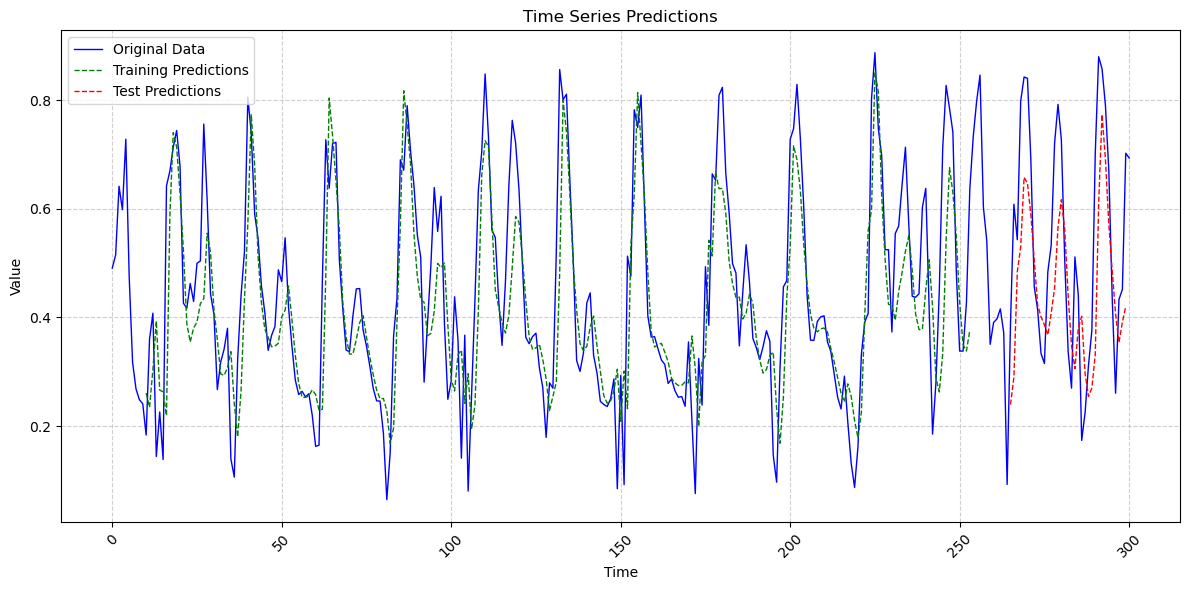

In [21]:
import matplotlib.pyplot as plt
import numpy as np

look_back = 10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot settings
plt.figure(figsize=(12, 6))

# Original data plot
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue', linewidth=1)

# Train prediction plot
plt.plot(trainPredictPlot, label='Training Predictions', color='green', linestyle='--', linewidth=1)

# Test prediction plot
plt.plot(testPredictPlot, label='Test Predictions', color='red', linestyle='--', linewidth=1)

# Enhancing aesthetics
plt.title('Time Series Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


df = pd.read_csv('Raichur_Pre\\Location1\\data_15.65_76.73.csv')
